In [53]:
import pyomo.environ as pyo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import DistanceMetric

# Exemplo 1

In [54]:
df_dados = pd.read_csv("lojas_1.csv", delimiter=";")
df_dados

,X,Y
0,287,221
1,355,97
2,377,31
3,156,452
4,461,100
5,134,533
6,371,134
7,205,552
8,278,317
9,201,505


,X,Y
0,287,221
1,355,97
2,377,31
3,156,452
4,461,100
5,134,533
6,371,134
7,205,552
8,278,317
9,201,505


In [55]:
dist = DistanceMetric.get_metric('euclidean')
dij = df_dados[['X', 'Y']].to_numpy()
dij = dist.pairwise(dij)
pd.DataFrame(dij)

,0,1,2,3,4,5,6,7,8,9
0,0.000000,141.421356,210.237960,265.559786,211.936311,347.495324,120.933866,341.005865,96.420952,296.735573
1,141.421356,0.000000,69.570109,406.971743,106.042444,488.811825,40.311289,479.087675,233.085821,436.096320
2,210.237960,69.570109,0.000000,475.480809,108.706026,557.721257,103.174609,548.657452,302.649963,505.620411
3,265.559786,406.971743,475.480809,0.000000,465.756374,83.934498,383.860652,111.359777,181.958787,69.526973
4,211.936311,106.042444,108.706026,465.756374,0.000000,542.602986,96.208108,519.461259,283.862643,481.274350
5,347.495324,488.811825,557.721257,83.934498,542.602986,0.000000,464.079735,73.498299,259.599692,72.615425
6,120.933866,40.311289,103.174609,383.860652,96.208108,464.079735,0.000000,449.755489,205.275425,408.094352
7,341.005865,479.087675,548.657452,111.359777,519.461259,73.498299,449.755489,0.000000,246.077224,47.169906
8,96.420952,233.085821,302.649963,181.958787,283.862643,259.599692,205.275425,246.077224,0.000000,203.157574
9,296.735573,436.096320,505.620411,69.526973,481.274350,72.615425,408.094352,47.169906,203.157574,0.000000


,0,1,2,3,4,5,6,7,8,9
0,0.000000,141.421356,210.237960,265.559786,211.936311,347.495324,120.933866,341.005865,96.420952,296.735573
1,141.421356,0.000000,69.570109,406.971743,106.042444,488.811825,40.311289,479.087675,233.085821,436.096320
2,210.237960,69.570109,0.000000,475.480809,108.706026,557.721257,103.174609,548.657452,302.649963,505.620411
3,265.559786,406.971743,475.480809,0.000000,465.756374,83.934498,383.860652,111.359777,181.958787,69.526973
4,211.936311,106.042444,108.706026,465.756374,0.000000,542.602986,96.208108,519.461259,283.862643,481.274350
5,347.495324,488.811825,557.721257,83.934498,542.602986,0.000000,464.079735,73.498299,259.599692,72.615425
6,120.933866,40.311289,103.174609,383.860652,96.208108,464.079735,0.000000,449.755489,205.275425,408.094352
7,341.005865,479.087675,548.657452,111.359777,519.461259,73.498299,449.755489,0.000000,246.077224,47.169906
8,96.420952,233.085821,302.649963,181.958787,283.862643,259.599692,205.275425,246.077224,0.000000,203.157574
9,296.735573,436.096320,505.620411,69.526973,481.274350,72.615425,408.094352,47.169906,203.157574,0.000000


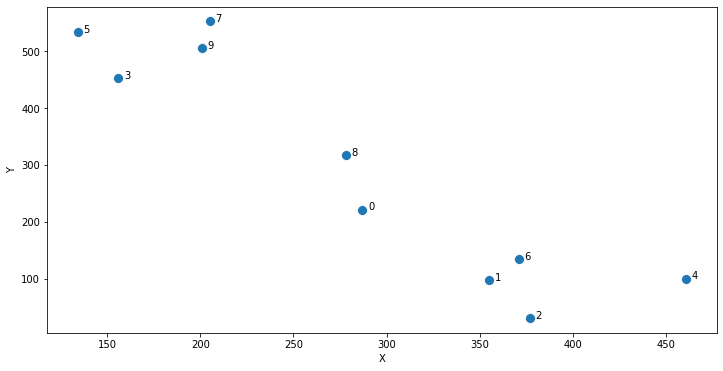

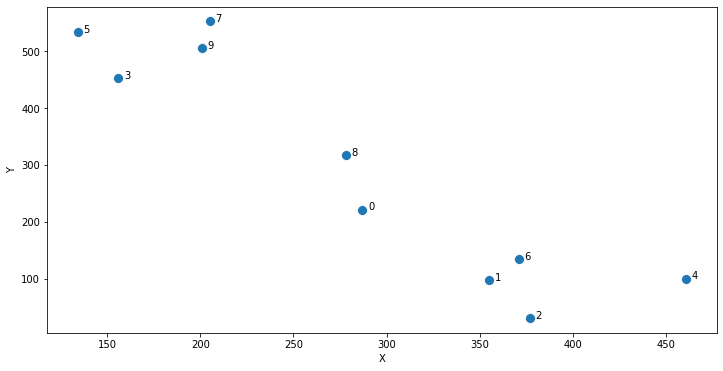

In [56]:
plt.figure(figsize=(12, 6))
plot = sns.scatterplot(data=df_dados, x="X", y="Y", s=100)
for index, row in df_dados.iterrows():
    plot.text(row['X']+3, row['Y'], index, horizontalalignment='left')

## Modelo matemático exato

<br>

<b>Índices:</b>

$i = 1,...,m$

$j = 1,...,n$

<br>

<b>Parâmetros:</b>

$d_{ij} = \text{distância entre os pontos } i \text{ e } j$

$p = \text{número de medianas}$

<br>

<b>Variáveis de decisão:</b>

$
    y_{j}=
    \begin{cases}
      1, & \text{se o ponto } j \text{ é escolhido como mediana} \\
      0, & \text{caso contrário}
    \end{cases}
$

$
    x_{ij}=
    \begin{cases}
      1, & \text{se o ponto } i \text{ é alocado à mediana } j \\
      0, & \text{caso contrário}
    \end{cases}
$

####  Modelo de Programação Linear Inteira:

$\text{min }z = \sum\limits_{i=1}^{m} \sum\limits_{j=1}^{n} d_{ij} x_{ij}$

sujeito a:

$\sum\limits_{j=1}^{n} y_{j} = p$

$\sum\limits_{j=1}^{n} x_{ij} = 1, \forall \; i$

$x_{ij} \leq y_j, \forall \; i,j$

$y_j \in \{0,1\}, \forall \; j$

$x_{ij} \in \{0,1\}, \forall \; i,j$

In [57]:
modelo = pyo.ConcreteModel()

In [58]:
# Índices:
modelo.M = range(len(dij))
modelo.N = range(len(dij))
# Parâmetros
modelo.d = pyo.Param(modelo.M, modelo.N, initialize=lambda modelo, i, j: dij[i][j])
p = 3

In [59]:
modelo.y = pyo.Var(modelo.N, within=pyo.Binary)
modelo.x = pyo.Var(modelo.M, modelo.N, within=pyo.Binary)

In [60]:
def f_obj(modelo):
    return sum(modelo.x[i,j] * modelo.d[i,j] for i in modelo.M for j in modelo.N)

modelo.objetivo = pyo.Objective(rule=f_obj, sense=pyo.minimize)

In [61]:
modelo.restricao_a = pyo.Constraint(expr=sum(modelo.y[j] for j in modelo.N) == p)

In [62]:
modelo.restricao_b = pyo.ConstraintList()
for i in modelo.M:
    modelo.restricao_b.add(sum(modelo.x[i,j] for j in modelo.N) == 1)

In [63]:
modelo.restricao_c = pyo.ConstraintList()
for i in modelo.M:
    for j in modelo.N:
        modelo.restricao_c.add(modelo.x[i,j] <= modelo.y[j])

In [64]:
resultado = pyo.SolverFactory('glpk').solve(modelo)
print(resultado)


Problem: 
- Name: unknown
  Lower bound: 501.657097879459
  Upper bound: 501.657097879459
  Number of objectives: 1
  Number of constraints: 112
  Number of variables: 111
  Number of nonzeros: 311
  Sense: minimize
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 1
      Number of created subproblems: 1
  Error rc: 0
  Time: 0.04487943649291992
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


Problem: 
- Name: unknown
  Lower bound: 501.657097879459
  Upper bound: 501.657097879459
  Number of objectives: 1
  Number of constraints: 112
  Number of variables: 111
  Number of nonzeros: 311
  Sense: minimize
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 1
      Number of created subproblems: 1
  Error rc: 0
  Time: 0.04487943649291992
Solution: 
- number of solutions: 0
  number of solutions displayed:

In [65]:
modelo.y.pprint()

y : Size=10, Index=y_index
    Key : Lower : Value : Upper : Fixed : Stale : Domain
      0 :     0 :   1.0 :     1 : False : False : Binary
      1 :     0 :   1.0 :     1 : False : False : Binary
      2 :     0 :   0.0 :     1 : False : False : Binary
      3 :     0 :   0.0 :     1 : False : False : Binary
      4 :     0 :   0.0 :     1 : False : False : Binary
      5 :     0 :   0.0 :     1 : False : False : Binary
      6 :     0 :   0.0 :     1 : False : False : Binary
      7 :     0 :   0.0 :     1 : False : False : Binary
      8 :     0 :   0.0 :     1 : False : False : Binary
      9 :     0 :   1.0 :     1 : False : False : Binary
y : Size=10, Index=y_index
    Key : Lower : Value : Upper : Fixed : Stale : Domain
      0 :     0 :   1.0 :     1 : False : False : Binary
      1 :     0 :   1.0 :     1 : False : False : Binary
      2 :     0 :   0.0 :     1 : False : False : Binary
      3 :     0 :   0.0 :     1 : False : False : Binary
      4 :     0 :   0.0 :     1 : 

In [66]:
list_y = list(modelo.y.keys())
[j for j in list_y if modelo.y[j]() == 1]

[0, 1, 9]

[0, 1, 9]

In [67]:
dados_modelo = df_dados.copy()
dados_modelo['Mediana'] = [modelo.y[i]() for i in list_y]
dados_modelo

,X,Y,Mediana
0,287,221,1.0
1,355,97,1.0
2,377,31,0.0
3,156,452,0.0
4,461,100,0.0
5,134,533,0.0
6,371,134,0.0
7,205,552,0.0
8,278,317,0.0
9,201,505,1.0


,X,Y,Mediana
0,287,221,1.0
1,355,97,1.0
2,377,31,0.0
3,156,452,0.0
4,461,100,0.0
5,134,533,0.0
6,371,134,0.0
7,205,552,0.0
8,278,317,0.0
9,201,505,1.0


In [68]:
modelo.x.pprint()

x : Size=100, Index=x_index
    Key    : Lower : Value : Upper : Fixed : Stale : Domain
    (0, 0) :     0 :   1.0 :     1 : False : False : Binary
    (0, 1) :     0 :   0.0 :     1 : False : False : Binary
    (0, 2) :     0 :   0.0 :     1 : False : False : Binary
    (0, 3) :     0 :   0.0 :     1 : False : False : Binary
    (0, 4) :     0 :   0.0 :     1 : False : False : Binary
    (0, 5) :     0 :   0.0 :     1 : False : False : Binary
    (0, 6) :     0 :   0.0 :     1 : False : False : Binary
    (0, 7) :     0 :   0.0 :     1 : False : False : Binary
    (0, 8) :     0 :   0.0 :     1 : False : False : Binary
    (0, 9) :     0 :   0.0 :     1 : False : False : Binary
    (1, 0) :     0 :   0.0 :     1 : False : False : Binary
    (1, 1) :     0 :   1.0 :     1 : False : False : Binary
    (1, 2) :     0 :   0.0 :     1 : False : False : Binary
    (1, 3) :     0 :   0.0 :     1 : False : False : Binary
    (1, 4) :     0 :   0.0 :     1 : False : False : Binary
    (1, 5) :

In [69]:
list_x = list(modelo.x.keys())
alocacoes = [i for i in list_x if modelo.x[i]() == 1]
alocacoes.sort(key=lambda x:x[0])
alocacoes

[(0, 0),
 (1, 1),
 (2, 1),
 (3, 9),
 (4, 1),
 (5, 9),
 (6, 1),
 (7, 9),
 (8, 0),
 (9, 9)]

[(0, 0),
 (1, 1),
 (2, 1),
 (3, 9),
 (4, 1),
 (5, 9),
 (6, 1),
 (7, 9),
 (8, 0),
 (9, 9)]

In [70]:
medianas = [alocacao[1] for alocacao in alocacoes]
dados_modelo['Alocacao'] = medianas
dados_modelo

,X,Y,Mediana,Alocacao
0,287,221,1.0,0
1,355,97,1.0,1
2,377,31,0.0,1
3,156,452,0.0,9
4,461,100,0.0,1
5,134,533,0.0,9
6,371,134,0.0,1
7,205,552,0.0,9
8,278,317,0.0,0
9,201,505,1.0,9


,X,Y,Mediana,Alocacao
0,287,221,1.0,0
1,355,97,1.0,1
2,377,31,0.0,1
3,156,452,0.0,9
4,461,100,0.0,1
5,134,533,0.0,9
6,371,134,0.0,1
7,205,552,0.0,9
8,278,317,0.0,0
9,201,505,1.0,9


In [71]:
dados_modelo['Distancia'] = [dij[alocacao[0], alocacao[1]] for alocacao in alocacoes]
dados_modelo

,X,Y,Mediana,Alocacao,Distancia
0,287,221,1.0,0,0.000000
1,355,97,1.0,1,0.000000
2,377,31,0.0,1,69.570109
3,156,452,0.0,9,69.526973
4,461,100,0.0,1,106.042444
5,134,533,0.0,9,72.615425
6,371,134,0.0,1,40.311289
7,205,552,0.0,9,47.169906
8,278,317,0.0,0,96.420952
9,201,505,1.0,9,0.000000


,X,Y,Mediana,Alocacao,Distancia
0,287,221,1.0,0,0.000000
1,355,97,1.0,1,0.000000
2,377,31,0.0,1,69.570109
3,156,452,0.0,9,69.526973
4,461,100,0.0,1,106.042444
5,134,533,0.0,9,72.615425
6,371,134,0.0,1,40.311289
7,205,552,0.0,9,47.169906
8,278,317,0.0,0,96.420952
9,201,505,1.0,9,0.000000


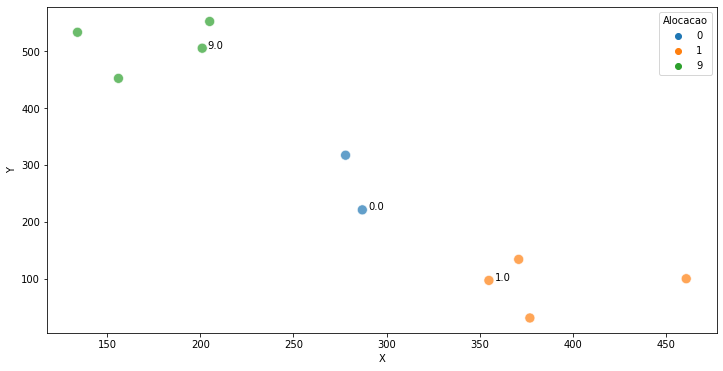

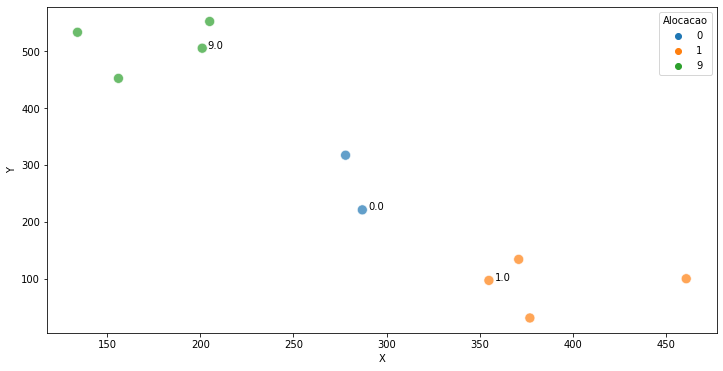

In [72]:
plt.figure(figsize=(12, 6))
plot = sns.scatterplot(data=dados_modelo, 
                       x="X", y="Y", 
                       hue="Alocacao", 
                       alpha=.7,
                       s=100,
                       palette="tab10")
highlights = dados_modelo[dados_modelo.index == dados_modelo.Alocacao]
for index, row in highlights.iterrows():
    plot.text(row['X']+3, row['Y'], row['Alocacao'], horizontalalignment='left')

In [73]:
dados_modelo_resumo = dados_modelo.copy()
resumo = dados_modelo_resumo.groupby('Alocacao', as_index=False).agg({"Distancia": "sum"})
resumo

,Alocacao,Distancia
0,0,96.420952
1,1,215.923842
2,9,189.312304


,Alocacao,Distancia
0,0,96.420952
1,1,215.923842
2,9,189.312304


In [74]:
resumo.Distancia.sum()

501.6570978794589

501.6570978794589

# Exemplo 2

In [75]:
df_dados = pd.read_csv("lojas_2.csv", delimiter=";")
df_dados

,X,Y,Demanda,Capacidade
0,287,221,40,483
1,355,97,133,394
2,377,31,39,345
3,156,452,63,414
4,461,100,127,180
5,134,533,92,207
6,371,134,77,523
7,205,552,78,369
8,278,317,67,296
9,201,505,56,362


,X,Y,Demanda,Capacidade
0,287,221,40,483
1,355,97,133,394
2,377,31,39,345
3,156,452,63,414
4,461,100,127,180
5,134,533,92,207
6,371,134,77,523
7,205,552,78,369
8,278,317,67,296
9,201,505,56,362


## Modelo matemático exato

<br>

<b>Índices:</b>

$i = 1,...,m$

$j = 1,...,n$

<br>

<b>Parâmetros:</b>

$d_{ij} = \text{distância entre os pontos } i \text{ e } j$

$p = \text{número de medianas}$

$C_i = \text{número de clientes no ponto }i$

$K_j = \text{capacidade da instalação no ponto }j \text{, caso seja escolhido como mediana}$

<br>

<b>Variáveis de decisão:</b>

$
    y_{j}=
    \begin{cases}
      1, & \text{se o ponto } j \text{ é escolhido como mediana} \\
      0, & \text{caso contrário}
    \end{cases}
$

$
    x_{ij}=
    \begin{cases}
      1, & \text{se o ponto } i \text{ é alocado à mediana } j \\
      0, & \text{caso contrário}
    \end{cases}
$

####  Modelo de Programação Linear Inteira:

$\text{min }z = \sum\limits_{i=1}^{m} \sum\limits_{j=1}^{n} C_i d_{ij} x_{ij}$

sujeito a:

$\sum\limits_{j=1}^{n} y_{j} = p$

$\sum\limits_{j=1}^{n} x_{ij} = 1, \forall \; i$

$\sum\limits_{i=1}^{m} C_i x_{ij} \leq K_j y_j, \forall \; j$

$y_j \in \{0,1\}, \forall \; j$

$x_{ij} \in \{0,1\}, \forall \; i,j$

In [76]:
# Declaração do modelo:
modelo2 = pyo.ConcreteModel()

# Matriz de distâncias:
dist = DistanceMetric.get_metric('euclidean')
dij = df_dados[['X', 'Y']].to_numpy()
dij = dist.pairwise(dij)
    
# Índices:
modelo2.M = range(len(dij))
modelo2.N = range(len(dij))
# Parâmetros:
modelo2.d = pyo.Param(modelo2.M, modelo2.N, initialize=lambda modelo, i, j: dij[i][j])
p = 3

In [77]:
# Vetores de demanda e capacidade
Ci = list(df_dados.Demanda)
Kj = list(df_dados.Capacidade)
modelo2.C = pyo.Param(modelo2.M, initialize=lambda modelo2, i: Ci[i])
modelo2.K = pyo.Param(modelo2.N, initialize=lambda modelo2, j: Kj[j])

In [78]:
# Variáveis de decisão:
modelo2.y = pyo.Var(modelo2.N, within=pyo.Binary)
modelo2.x = pyo.Var(modelo2.M, modelo2.N, within=pyo.Binary)

# Função objetivo:
def f_obj(modelo):
    return sum(modelo.C[i] * modelo.x[i,j] * modelo.d[i,j] for i in modelo.M for j in modelo.N)

modelo2.obj = pyo.Objective(rule=f_obj, sense=pyo.minimize)

# Sujeito a:

modelo2.restricao_a = pyo.Constraint(expr=sum(modelo2.y[j] for j in modelo2.N) == p)

modelo2.restricao_b = pyo.ConstraintList()
for i in modelo2.M:
    modelo2.restricao_b.add(sum(modelo2.x[i,j] for j in modelo2.N) == 1.0)

In [79]:
modelo2.restricao_c = pyo.ConstraintList()
for j in modelo2.N:
    modelo2.restricao_c.add(sum(modelo2.C[i] * modelo2.x[i,j] for i in modelo2.M) <= modelo2.K[j] * modelo2.y[j])

In [80]:
resultado2 = pyo.SolverFactory('glpk').solve(modelo2)
print(resultado2)


Problem: 
- Name: unknown
  Lower bound: 37881.5030639577
  Upper bound: 37881.5030639577
  Number of objectives: 1
  Number of constraints: 22
  Number of variables: 111
  Number of nonzeros: 221
  Sense: minimize
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 97
      Number of created subproblems: 97
  Error rc: 0
  Time: 0.04886913299560547
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


Problem: 
- Name: unknown
  Lower bound: 37881.5030639577
  Upper bound: 37881.5030639577
  Number of objectives: 1
  Number of constraints: 22
  Number of variables: 111
  Number of nonzeros: 221
  Sense: minimize
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 97
      Number of created subproblems: 97
  Error rc: 0
  Time: 0.04886913299560547
Solution: 
- number of solutions: 0
  number of solutions displaye

In [81]:
# Medianas
list_y = list(modelo2.y.keys())
dados_modelo2 = df_dados.copy()
dados_modelo2['Mediana'] = [modelo2.y[i]() for i in list_y]

# Alocações:
list_x = list(modelo2.x.keys())
alocacoes = [i for i in list_x if modelo2.x[i]() == 1]
alocacoes.sort(key=lambda x:x[0])
medianas = [alocacao[1] for alocacao in alocacoes]
dados_modelo2['Alocacao'] = medianas

# Distância
dados_modelo2['Distancia'] = [dij[alocacao[0], alocacao[1]] for alocacao in alocacoes]

dados_modelo2

,X,Y,Demanda,Capacidade,Mediana,Alocacao,Distancia
0,287,221,40,483,0.0,8,96.420952
1,355,97,133,394,1.0,1,0.000000
2,377,31,39,345,0.0,1,69.570109
3,156,452,63,414,0.0,9,69.526973
4,461,100,127,180,0.0,1,106.042444
5,134,533,92,207,0.0,9,72.615425
6,371,134,77,523,0.0,1,40.311289
7,205,552,78,369,0.0,9,47.169906
8,278,317,67,296,1.0,8,0.000000
9,201,505,56,362,1.0,9,0.000000


,X,Y,Demanda,Capacidade,Mediana,Alocacao,Distancia
0,287,221,40,483,0.0,8,96.420952
1,355,97,133,394,1.0,1,0.000000
2,377,31,39,345,0.0,1,69.570109
3,156,452,63,414,0.0,9,69.526973
4,461,100,127,180,0.0,1,106.042444
5,134,533,92,207,0.0,9,72.615425
6,371,134,77,523,0.0,1,40.311289
7,205,552,78,369,0.0,9,47.169906
8,278,317,67,296,1.0,8,0.000000
9,201,505,56,362,1.0,9,0.000000


In [82]:
dados_modelo2['Distancia_total'] = dados_modelo2['Distancia'] * dados_modelo2['Demanda']
dados_modelo2

,X,Y,Demanda,Capacidade,Mediana,Alocacao,Distancia,Distancia_total
0,287,221,40,483,0.0,8,96.420952,3856.838083
1,355,97,133,394,1.0,1,0.000000,0.000000
2,377,31,39,345,0.0,1,69.570109,2713.234232
3,156,452,63,414,0.0,9,69.526973,4380.199311
4,461,100,127,180,0.0,1,106.042444,13467.390430
5,134,533,92,207,0.0,9,72.615425,6680.619133
6,371,134,77,523,0.0,1,40.311289,3103.969233
7,205,552,78,369,0.0,9,47.169906,3679.252642
8,278,317,67,296,1.0,8,0.000000,0.000000
9,201,505,56,362,1.0,9,0.000000,0.000000


,X,Y,Demanda,Capacidade,Mediana,Alocacao,Distancia,Distancia_total
0,287,221,40,483,0.0,8,96.420952,3856.838083
1,355,97,133,394,1.0,1,0.000000,0.000000
2,377,31,39,345,0.0,1,69.570109,2713.234232
3,156,452,63,414,0.0,9,69.526973,4380.199311
4,461,100,127,180,0.0,1,106.042444,13467.390430
5,134,533,92,207,0.0,9,72.615425,6680.619133
6,371,134,77,523,0.0,1,40.311289,3103.969233
7,205,552,78,369,0.0,9,47.169906,3679.252642
8,278,317,67,296,1.0,8,0.000000,0.000000
9,201,505,56,362,1.0,9,0.000000,0.000000


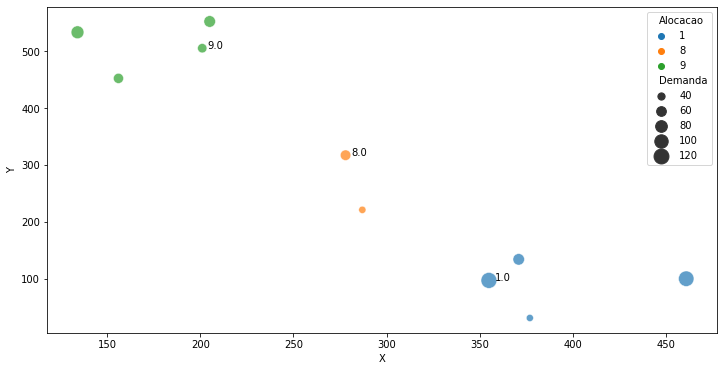

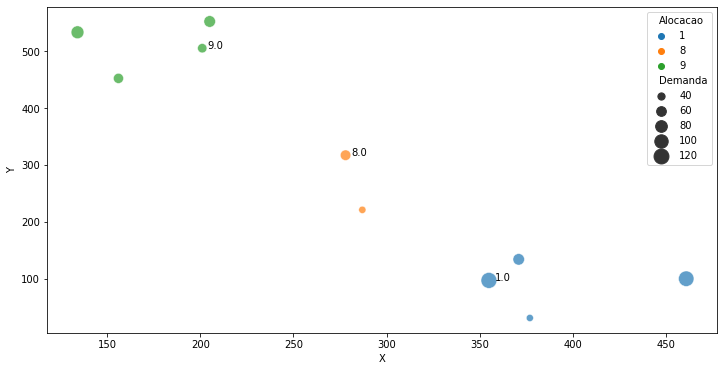

In [83]:
plt.figure(figsize=(12, 6))
plot = sns.scatterplot(data=dados_modelo2, 
                       x="X", y="Y", 
                       hue="Alocacao", 
                       size='Demanda',  
                       sizes=(50, 250),
                       alpha=.7,
                       palette="tab10")
highlights = dados_modelo2[dados_modelo2.index == dados_modelo2.Alocacao]
for index, row in highlights.iterrows():
    plot.text(row['X']+3, row['Y'], row['Alocacao'], horizontalalignment='left')

In [84]:
dados_modelo2_resumo = dados_modelo2.copy()
resumo2 = dados_modelo2_resumo.groupby('Alocacao', as_index=False).agg({"Demanda": "sum", 
                                                        "Distancia": "sum", 
                                                        "Distancia_total": "sum"})
sum_dist2 = resumo2.Distancia.sum()
sum_dist_total2 = resumo2.Distancia_total.sum()
print("Distância:", sum_dist2)
print("Distância_total:", sum_dist_total2)

Distância: 501.6570978794589
Distância_total: 37881.50306395767
Distância: 501.6570978794589
Distância_total: 37881.50306395767


In [85]:
resumo2

,Alocacao,Demanda,Distancia,Distancia_total
0,1,376,215.923842,19284.593896
1,8,107,96.420952,3856.838083
2,9,289,189.312304,14740.071085


,Alocacao,Demanda,Distancia,Distancia_total
0,1,376,215.923842,19284.593896
1,8,107,96.420952,3856.838083
2,9,289,189.312304,14740.071085


# Exemplo 3

In [86]:
df_dados = pd.read_csv("lojas_3.csv", delimiter=";")
df_dados

,X,Y,Demanda,Capacidade,Custo
0,287,221,40,483,17646
1,355,97,133,394,13991
2,377,31,39,345,10496
3,156,452,63,414,13925
4,461,100,127,180,5657
5,134,533,92,207,6818
6,371,134,77,523,16380
7,205,552,78,369,12864
8,278,317,67,296,8884
9,201,505,56,362,12634


,X,Y,Demanda,Capacidade,Custo
0,287,221,40,483,17646
1,355,97,133,394,13991
2,377,31,39,345,10496
3,156,452,63,414,13925
4,461,100,127,180,5657
5,134,533,92,207,6818
6,371,134,77,523,16380
7,205,552,78,369,12864
8,278,317,67,296,8884
9,201,505,56,362,12634


## Modelo matemático exato

<br>

<b>Índices:</b>

$i = 1,...,m$

$j = 1,...,n$

<br>

<b>Parâmetros:</b>

$d_{ij} = \text{distância entre os pontos } i \text{ e } j$

$C_i = \text{número de clientes no ponto }i$

$K_j = \text{capacidade da instalação no ponto }j \text{, caso seja escolhido como mediana}$

$S_j = \text{custo de construir a instalação no ponto }j \text{ caso seja escolhido como mediana}$

$B = \text{orçamento disponível}$

<br>

<b>Variáveis de decisão:</b>

$
    y_{j}=
    \begin{cases}
      1, & \text{se o ponto } j \text{ é escolhido como mediana} \\
      0, & \text{caso contrário}
    \end{cases}
$

$
    x_{ij}=
    \begin{cases}
      1, & \text{se o ponto } i \text{ é alocado à mediana } j \\
      0, & \text{caso contrário}
    \end{cases}
$

####  Modelo de Programação Linear Inteira:

$\text{min }z = \sum\limits_{i=1}^{m} \sum\limits_{j=1}^{n} C_i d_{ij} x_{ij}$

sujeito a:

$\sum\limits_{j=1}^{n} S_j y_j \leq B$

$\sum\limits_{j=1}^{n} x_{ij} = 1, \forall \; i$

$\sum\limits_{i=1}^{m} C_i x_{ij} \leq K_j y_j, \forall \; j$

$y_j \in \{0,1\}, \forall \; j$

$x_{ij} \in \{0,1\}, \forall \; i,j$

In [87]:
# Declaração do modelo:
modelo3 = pyo.ConcreteModel()

# Matriz de distâncias:
dist = DistanceMetric.get_metric('euclidean')
dij = df_dados[['X', 'Y']].to_numpy()
dij = dist.pairwise(dij)
    
# Índices:
modelo3.M = range(len(dij))
modelo3.N = range(len(dij))

# Parâmetros:

# Vetores de demanda e capacidade
Ci = list(df_dados.Demanda)
Kj = list(df_dados.Capacidade)

modelo3.d = pyo.Param(modelo3.M, modelo3.N, initialize=lambda modelo, i, j: dij[i][j])
modelo3.C = pyo.Param(modelo3.M, initialize=lambda modelo3, i: Ci[i])
modelo3.K = pyo.Param(modelo3.N, initialize=lambda modelo3, j: Kj[j])

In [88]:
# Vetor de custos:
Sj = list(df_dados.Custo)

modelo3.S = pyo.Param(modelo3.N, initialize=lambda modelo, j: Sj[j])
B = 70000

In [89]:
# Variáveis de decisão:
modelo3.y = pyo.Var(modelo3.N, within=pyo.Binary)
modelo3.x = pyo.Var(modelo3.M, modelo3.N, within=pyo.Binary)

# Função objetivo:
def f_obj(modelo):
    return sum(modelo.C[i] * modelo.x[i,j] * modelo.d[i,j] for i in modelo.M for j in modelo.N)

modelo3.obj = pyo.Objective(rule=f_obj, sense=pyo.minimize)

# Sujeito a:

modelo3.restricao_b = pyo.ConstraintList()
for i in modelo3.M:
    modelo3.restricao_b.add(sum(modelo3.x[i,j] for j in modelo3.N) == 1.0)
    
modelo3.restricao_c = pyo.ConstraintList()
for j in modelo3.N:
    modelo3.restricao_c.add(sum(modelo3.C[i] * modelo3.x[i,j] for i in modelo3.M) <= modelo3.K[j] * modelo3.y[j])

In [90]:
modelo3.restricao_a = pyo.Constraint(expr=sum(modelo3.S[j] * modelo3.y[j] for j in modelo3.N) <= B)

In [91]:
resultado3 = pyo.SolverFactory('glpk').solve(modelo3)
print(resultado3)


Problem: 
- Name: unknown
  Lower bound: 12315.5562656924
  Upper bound: 12315.5562656924
  Number of objectives: 1
  Number of constraints: 22
  Number of variables: 111
  Number of nonzeros: 221
  Sense: minimize
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 53
      Number of created subproblems: 53
  Error rc: 0
  Time: 0.04288601875305176
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


Problem: 
- Name: unknown
  Lower bound: 12315.5562656924
  Upper bound: 12315.5562656924
  Number of objectives: 1
  Number of constraints: 22
  Number of variables: 111
  Number of nonzeros: 221
  Sense: minimize
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 53
      Number of created subproblems: 53
  Error rc: 0
  Time: 0.04288601875305176
Solution: 
- number of solutions: 0
  number of solutions displaye

In [92]:
# Medianas
list_y = list(modelo3.y.keys())
dados_modelo3 = df_dados.copy()
dados_modelo3['Mediana'] = [modelo3.y[i]() for i in list_y]

# Alocações:
list_x = list(modelo3.x.keys())
alocacoes = [i for i in list_x if modelo3.x[i]() == 1]
alocacoes.sort(key=lambda x:x[0])
medianas = [alocacao[1] for alocacao in alocacoes]
dados_modelo3['Alocacao'] = medianas

# Distâncias
dados_modelo3['Distancia'] = [dij[alocacao[0], alocacao[1]] for alocacao in alocacoes]
dados_modelo3['Distancia_total'] = dados_modelo3['Distancia'] * dados_modelo3['Demanda']

dados_modelo3

,X,Y,Demanda,Capacidade,Custo,Mediana,Alocacao,Distancia,Distancia_total
0,287,221,40,483,17646,0.0,8,96.420952,3856.838083
1,355,97,133,394,13991,1.0,1,0.000000,0.000000
2,377,31,39,345,10496,0.0,1,69.570109,2713.234232
3,156,452,63,414,13925,1.0,3,0.000000,0.000000
4,461,100,127,180,5657,1.0,4,0.000000,0.000000
5,134,533,92,207,6818,1.0,5,0.000000,0.000000
6,371,134,77,523,16380,0.0,1,40.311289,3103.969233
7,205,552,78,369,12864,1.0,7,0.000000,0.000000
8,278,317,67,296,8884,1.0,8,0.000000,0.000000
9,201,505,56,362,12634,0.0,7,47.169906,2641.514717


,X,Y,Demanda,Capacidade,Custo,Mediana,Alocacao,Distancia,Distancia_total
0,287,221,40,483,17646,0.0,8,96.420952,3856.838083
1,355,97,133,394,13991,1.0,1,0.000000,0.000000
2,377,31,39,345,10496,0.0,1,69.570109,2713.234232
3,156,452,63,414,13925,1.0,3,0.000000,0.000000
4,461,100,127,180,5657,1.0,4,0.000000,0.000000
5,134,533,92,207,6818,1.0,5,0.000000,0.000000
6,371,134,77,523,16380,0.0,1,40.311289,3103.969233
7,205,552,78,369,12864,1.0,7,0.000000,0.000000
8,278,317,67,296,8884,1.0,8,0.000000,0.000000
9,201,505,56,362,12634,0.0,7,47.169906,2641.514717


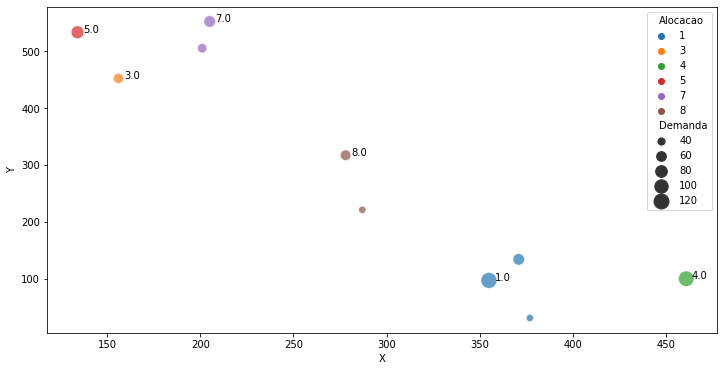

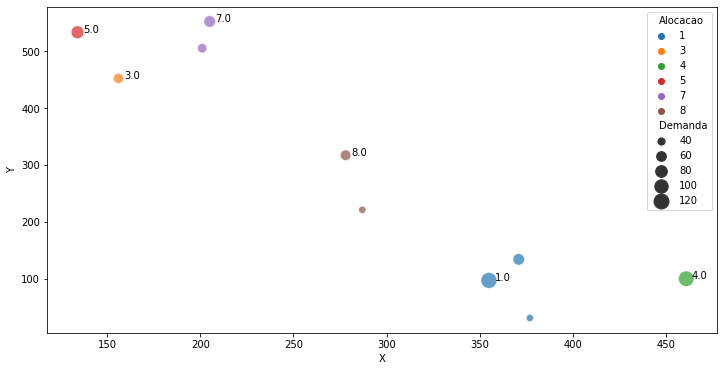

In [93]:
plt.figure(figsize=(12, 6))
plot = sns.scatterplot(data=dados_modelo3, 
                       x="X", y="Y", 
                       hue="Alocacao", 
                       size='Demanda',  
                       sizes=(50, 250),
                       alpha=.7,
                       palette="tab10")
highlights = dados_modelo3[dados_modelo3.index == dados_modelo3.Alocacao]
for index, row in highlights.iterrows():
    plot.text(row['X']+3, row['Y'], row['Alocacao'], horizontalalignment='left') 

In [94]:
dados_modelo3_resumo = dados_modelo3.copy()
dados_modelo3_resumo['Custo'] = dados_modelo3_resumo['Custo'] * dados_modelo3_resumo['Mediana']
resumo3 = dados_modelo3_resumo.groupby('Alocacao', as_index=False).agg({"Demanda": "sum", 
                                                        "Distancia": "sum", 
                                                        "Distancia_total": "sum",
                                                        "Custo": "sum"})
sum_dist3 = resumo3.Distancia.sum()
sum_dist_total3 = resumo3.Distancia_total.sum()
sum_custo3 = resumo3.Custo.sum()
print("Distância:", sum_dist3)
print("Distância_total:", sum_dist_total3)
print("Custo:", sum_custo3)

Distância: 253.4722550054093
Distância_total: 12315.556265692427
Custo: 62139.0
Distância: 253.4722550054093
Distância_total: 12315.556265692427
Custo: 62139.0


In [95]:
resumo3

,Alocacao,Demanda,Distancia,Distancia_total,Custo
0,1,249,109.881397,5817.203466,13991.0
1,3,63,0.000000,0.000000,13925.0
2,4,127,0.000000,0.000000,5657.0
3,5,92,0.000000,0.000000,6818.0
4,7,134,47.169906,2641.514717,12864.0
5,8,107,96.420952,3856.838083,8884.0


,Alocacao,Demanda,Distancia,Distancia_total,Custo
0,1,249,109.881397,5817.203466,13991.0
1,3,63,0.000000,0.000000,13925.0
2,4,127,0.000000,0.000000,5657.0
3,5,92,0.000000,0.000000,6818.0
4,7,134,47.169906,2641.514717,12864.0
5,8,107,96.420952,3856.838083,8884.0


# Exemplo 4

In [96]:
df_dados = pd.read_csv("lojas_3.csv", delimiter=";")
df_dados

,X,Y,Demanda,Capacidade,Custo
0,287,221,40,483,17646
1,355,97,133,394,13991
2,377,31,39,345,10496
3,156,452,63,414,13925
4,461,100,127,180,5657
5,134,533,92,207,6818
6,371,134,77,523,16380
7,205,552,78,369,12864
8,278,317,67,296,8884
9,201,505,56,362,12634


,X,Y,Demanda,Capacidade,Custo
0,287,221,40,483,17646
1,355,97,133,394,13991
2,377,31,39,345,10496
3,156,452,63,414,13925
4,461,100,127,180,5657
5,134,533,92,207,6818
6,371,134,77,523,16380
7,205,552,78,369,12864
8,278,317,67,296,8884
9,201,505,56,362,12634


## Modelo matemático exato

<br>

<b>Índices:</b>

$i = 1,...,m$

$j = 1,...,n$

<br>

<b>Parâmetros:</b>

$d_{ij} = \text{distância entre os pontos } i \text{ e } j$

$C_i = \text{número de clientes no ponto }i$

$K_j = \text{capacidade da instalação no ponto }j \text{, caso seja escolhido como mediana}$

$S_j = \text{custo de construir a instalação no ponto }j \text{ caso seja escolhido como mediana}$

$B = \text{orçamento disponível}$

$T = \text{grupo de instalações concorrentes}$

<br>

<b>Variáveis de decisão:</b>

$
    y_{j}=
    \begin{cases}
      1, & \text{se o ponto } j \text{ é escolhido como mediana} \\
      0, & \text{caso contrário}
    \end{cases}
$

$
    x_{ij}=
    \begin{cases}
      1, & \text{se o ponto } i \text{ é alocado à mediana } j \\
      0, & \text{caso contrário}
    \end{cases}
$

####  Modelo de Programação Linear Inteira:

$\text{min }z = \sum\limits_{i=1}^{m} \sum\limits_{j=1}^{n} C_i d_{ij} x_{ij}$

sujeito a:

$\sum\limits_{j=1}^{n} S_j y_j \leq B$

$\sum\limits_{j=1}^{n} x_{ij} = 1, \forall \; i$

$\sum\limits_{i=1}^{m} C_i x_{ij} \leq K_j y_j, \forall \; j$

$\sum\limits_{j \in T} y_{j} \leq 1$

$y_j \in \{0,1\}, \forall \; j$

$x_{ij} \in \{0,1\}, \forall \; i,j$

In [97]:
# Declaração do modelo:
modelo4 = pyo.ConcreteModel()

# Matriz de distâncias:
dist = DistanceMetric.get_metric('euclidean')
dij = df_dados[['X', 'Y']].to_numpy()
dij = dist.pairwise(dij)
    
# Índices:
modelo4.M = range(len(dij))
modelo4.N = range(len(dij))

# Parâmetros:

# Vetores de demanda, capacidade e custo
Ci = list(df_dados.Demanda)
Kj = list(df_dados.Capacidade)
Sj = list(df_dados.Custo)

modelo4.d = pyo.Param(modelo4.M, modelo4.N, initialize=lambda modelo, i, j: dij[i][j])
modelo4.C = pyo.Param(modelo4.M, initialize=lambda modelo4, i: Ci[i])
modelo4.K = pyo.Param(modelo4.N, initialize=lambda modelo4, j: Kj[j])
modelo4.S = pyo.Param(modelo4.N, initialize=lambda modelo4, j: Sj[j])
B = 70000
T = [3,5,7]

In [98]:
# Variáveis de decisão:
modelo4.y = pyo.Var(modelo4.N, within=pyo.Binary)
modelo4.x = pyo.Var(modelo4.M, modelo4.N, within=pyo.Binary)

# Função objetivo:
def f_obj(modelo):
    return sum(modelo.C[i] * modelo.x[i,j] * modelo.d[i,j] for i in modelo.M for j in modelo.N)

modelo4.obj = pyo.Objective(rule=f_obj, sense=pyo.minimize)

# Sujeito a:

modelo4.restricao_a = pyo.Constraint(expr=sum(modelo4.S[j] * modelo4.y[j] for j in modelo4.N) <= B)

modelo4.restricao_b = pyo.ConstraintList()
for i in modelo4.M:
    modelo4.restricao_b.add(sum(modelo4.x[i,j] for j in modelo4.N) == 1.0)
    
modelo4.restricao_c = pyo.ConstraintList()
for j in modelo4.N:
    modelo4.restricao_c.add(sum(modelo4.C[i] * modelo4.x[i,j] for i in modelo4.M) <= modelo4.K[j] * modelo4.y[j])

In [99]:
modelo4.restricao_d = pyo.Constraint(expr=sum(modelo4.y[j] for j in modelo4.N if j in T) <= 1)

In [100]:
resultado4 = pyo.SolverFactory('glpk').solve(modelo4)
print(resultado4)


Problem: 
- Name: unknown
  Lower bound: 13876.6554175552
  Upper bound: 13876.6554175552
  Number of objectives: 1
  Number of constraints: 23
  Number of variables: 111
  Number of nonzeros: 224
  Sense: minimize
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 21
      Number of created subproblems: 21
  Error rc: 0
  Time: 0.04088997840881348
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


Problem: 
- Name: unknown
  Lower bound: 13876.6554175552
  Upper bound: 13876.6554175552
  Number of objectives: 1
  Number of constraints: 23
  Number of variables: 111
  Number of nonzeros: 224
  Sense: minimize
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 21
      Number of created subproblems: 21
  Error rc: 0
  Time: 0.04088997840881348
Solution: 
- number of solutions: 0
  number of solutions displaye

In [101]:
# Medianas
list_y = list(modelo4.y.keys())
dados_modelo4 = df_dados.copy()
dados_modelo4['Mediana'] = [modelo4.y[i]() for i in list_y]

# Alocações:
list_x = list(modelo4.x.keys())
alocacoes = [i for i in list_x if modelo4.x[i]() == 1]
alocacoes.sort(key=lambda x:x[0])
medianas = [alocacao[1] for alocacao in alocacoes]
dados_modelo4['Alocacao'] = medianas

# Distâncias
dados_modelo4['Distancia'] = [dij[alocacao[0], alocacao[1]] for alocacao in alocacoes]
dados_modelo4['Distancia_total'] = dados_modelo4['Distancia'] * dados_modelo4['Demanda']

dados_modelo4

,X,Y,Demanda,Capacidade,Custo,Mediana,Alocacao,Distancia,Distancia_total
0,287,221,40,483,17646,1.0,0,0.000000,0.000000
1,355,97,133,394,13991,1.0,1,0.000000,0.000000
2,377,31,39,345,10496,0.0,1,69.570109,2713.234232
3,156,452,63,414,13925,0.0,9,69.526973,4380.199311
4,461,100,127,180,5657,1.0,4,0.000000,0.000000
5,134,533,92,207,6818,1.0,5,0.000000,0.000000
6,371,134,77,523,16380,0.0,1,40.311289,3103.969233
7,205,552,78,369,12864,0.0,9,47.169906,3679.252642
8,278,317,67,296,8884,1.0,8,0.000000,0.000000
9,201,505,56,362,12634,1.0,9,0.000000,0.000000


,X,Y,Demanda,Capacidade,Custo,Mediana,Alocacao,Distancia,Distancia_total
0,287,221,40,483,17646,1.0,0,0.000000,0.000000
1,355,97,133,394,13991,1.0,1,0.000000,0.000000
2,377,31,39,345,10496,0.0,1,69.570109,2713.234232
3,156,452,63,414,13925,0.0,9,69.526973,4380.199311
4,461,100,127,180,5657,1.0,4,0.000000,0.000000
5,134,533,92,207,6818,1.0,5,0.000000,0.000000
6,371,134,77,523,16380,0.0,1,40.311289,3103.969233
7,205,552,78,369,12864,0.0,9,47.169906,3679.252642
8,278,317,67,296,8884,1.0,8,0.000000,0.000000
9,201,505,56,362,12634,1.0,9,0.000000,0.000000


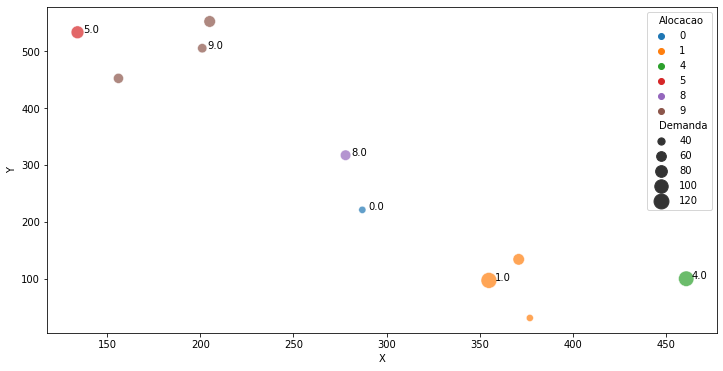

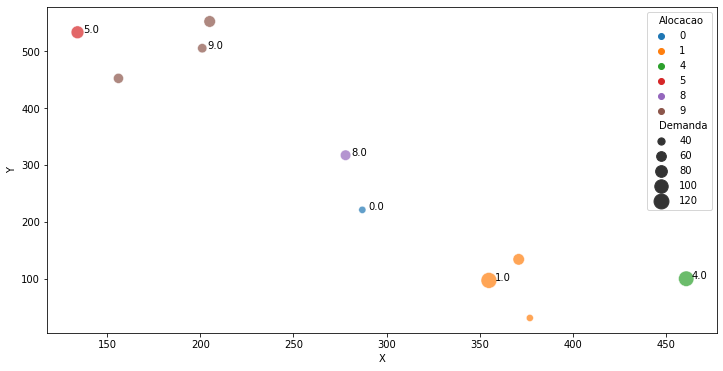

In [102]:
plt.figure(figsize=(12, 6))
plot = sns.scatterplot(data=dados_modelo4, 
                       x="X", y="Y", 
                       hue="Alocacao", 
                       size='Demanda',  
                       sizes=(50, 250),
                       alpha=.7,
                       palette="tab10")
highlights = dados_modelo4[dados_modelo4.index == dados_modelo4.Alocacao]
for index, row in highlights.iterrows():
    plot.text(row['X']+3, row['Y'], row['Alocacao'], horizontalalignment='left') 

In [103]:
dados_modelo4_resumo = dados_modelo4.copy()
dados_modelo4_resumo['Custo'] = dados_modelo4_resumo['Custo'] * dados_modelo4_resumo['Mediana']
resumo4 = dados_modelo4_resumo.groupby('Alocacao', as_index=False).agg({"Demanda": "sum", 
                                                        "Distancia": "sum", 
                                                        "Distancia_total": "sum",
                                                        "Custo": "sum"})
sum_dist4 = resumo4.Distancia.sum()
sum_dist_total4 = resumo4.Distancia_total.sum()
sum_custo4 = resumo4.Custo.sum()
print("Distância:", sum_dist4)
print("Distância_total:", sum_dist_total4)
print("Custo:", sum_custo4)

Distância: 226.57827610855492
Distância_total: 13876.655417555197
Custo: 65630.0
Distância: 226.57827610855492
Distância_total: 13876.655417555197
Custo: 65630.0


In [104]:
resumo4

,Alocacao,Demanda,Distancia,Distancia_total,Custo
0,0,40,0.000000,0.000000,17646.0
1,1,249,109.881397,5817.203466,13991.0
2,4,127,0.000000,0.000000,5657.0
3,5,92,0.000000,0.000000,6818.0
4,8,67,0.000000,0.000000,8884.0
5,9,197,116.696879,8059.451952,12634.0


,Alocacao,Demanda,Distancia,Distancia_total,Custo
0,0,40,0.000000,0.000000,17646.0
1,1,249,109.881397,5817.203466,13991.0
2,4,127,0.000000,0.000000,5657.0
3,5,92,0.000000,0.000000,6818.0
4,8,67,0.000000,0.000000,8884.0
5,9,197,116.696879,8059.451952,12634.0
